Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data. 
* You must use proper labeling of your plots, including aspects: Plot Titles (with date of analysis) & Axes Labels.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format. 

from citipy import citipy
city = citipy.nearest_city(22.99, 120.21)
city
citipy.City instance at 0x1069b6518>

city.city_name     # Tainan, my home town
'tainan'

city.country_code
'tw'                  # And the country is surely Taiwan

In [2]:
# Dependencies
import pandas as pd
import random
import numpy as np
import requests
import json
from citipy import citipy
import matplotlib.pyplot as plt
import seaborn as sns

# Google API Key
wkey = '03f86711a729435d41bf2a6a7729afb3'

In [3]:
#create an empty list to store cities
cities = []
citiesdict = []

#loop to fill cities until the list contains 500 entries
while len(cities) < 500:
    lat = random.uniform(-90, 90)
    lng = random.uniform(-180, 180)
    
    city = citipy.nearest_city(lat, lng).city_name
    
    if city not in cities:
        citiesdict.append({'city_name':city,'lat':lat,'lng':lng})
        cities.append(city)


example of possible methods

cities = []

while len(cities) <= 5:
    latitude = random.randint(-90.00,90.00)
    longitude = random.randint(-180.00, 180.00)
    city = cp.nearest_city(latitude, longitude)
    if city not in cities:
        cities.append(city.city_name + "," + city.country_code)
    else:
        continue

print(cities)


for x in cities:
    temp = w.get_temperature()
    wind = w.get_wind()
    humid = w.get_humidity()
    cloud = w.get_clouds()
    print(x)
    (?)
    print("temp: " + str(temp['temp']))
    print("wind: " + str(wind['speed']))
    print("humidity: " + str(humid))
    print("cloudiness: " + str(cloud))
    print()

In [4]:
citiesdf = pd.DataFrame(citiesdict)
citiesdf.columns = (['City Name', 'Latitude', 'Longitude'])
citiesdf['Temperature'] = ''
citiesdf['Humidity'] = ''
citiesdf['Cloudiness'] = ''
citiesdf['Windspeed'] = ''
citiesdf.head()

,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed
0,beloha,-32.436986,40.894388,,,,
1,bathsheba,17.046541,-53.742206,,,,
2,cairns,-13.697872,145.463345,,,,
3,provideniya,53.321741,-173.708499,,,,
4,rikitea,-33.067920,-140.242062,,,,


Description:
To get access to weather API you need an API key whatever account you chose from Free to Enterprise.

Activation of an API key for Free and Startup plans takes 10 minutes. For other tariff plans it is 10 to 60 minutes.

We keep right to not to process API requests without API key.

API call:
http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID={APIKEY}
Parameters:
APPID {APIKEY} is your unique API key 
Example of API call:
api.openweathermap.org/data/2.5/forecast?id=524901&APPID=1111111111 

api.openweathermap.org/data/2.5/weather?q=London

In [5]:

#Testing Indvidual Line Calls
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
city = citiesdf.iloc[0,0]
complete_url = f'{base_url}{city}{end_url}'
data = requests.get(complete_url)
data = data.json()
data


NameError: name 'end_url' is not defined

In [6]:
#using the airport exercise as a basis -- loop through with rows from the newly created data frame
for index, row in citiesdf.iterrows():
    base_url = "http://api.openweathermap.org/data/2.5/weather?q="
    city = row['City Name']
    end_url = f"&APPID={wkey}"
    complete_url = f'{base_url}{city}{end_url}'
    data = requests.get(complete_url)
    data = data.json()
    
    print(f"Calling information for {city} index {index} from {complete_url}")
    try:
        citiesdf.at[index, "Temperature"]=data['main']['temp']*(9/5)-459.67
        citiesdf.at[index, "Humidity"]=data['main']['humidity']
        citiesdf.at[index, "Cloudiness"]=data['clouds']['all']
        citiesdf.at[index, "Windspeed"]=data['wind']['speed']
    except (KeyError, IndexError) as e:
        #remove row for city that doesn't have coordinates
        citiesdf.drop(index,axis=0,inplace=True)

citiesdf.head()

Calling information for beloha index 0 from http://api.openweathermap.org/data/2.5/weather?q=beloha&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for bathsheba index 1 from http://api.openweathermap.org/data/2.5/weather?q=bathsheba&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for cairns index 2 from http://api.openweathermap.org/data/2.5/weather?q=cairns&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for provideniya index 3 from http://api.openweathermap.org/data/2.5/weather?q=provideniya&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for rikitea index 4 from http://api.openweathermap.org/data/2.5/weather?q=rikitea&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for zinder index 5 from http://api.openweathermap.org/data/2.5/weather?q=zinder&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for barrow index 6 from http://api.openweathermap.org/data/2.5/weather?q=barrow&APPID=03f86711a729435d41bf2a6a7729afb3
Calling i

Calling information for fairbanks index 57 from http://api.openweathermap.org/data/2.5/weather?q=fairbanks&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for samfya index 58 from http://api.openweathermap.org/data/2.5/weather?q=samfya&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for hamadan index 59 from http://api.openweathermap.org/data/2.5/weather?q=hamadan&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for narsaq index 60 from http://api.openweathermap.org/data/2.5/weather?q=narsaq&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for pangoa index 61 from http://api.openweathermap.org/data/2.5/weather?q=pangoa&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for jamestown index 62 from http://api.openweathermap.org/data/2.5/weather?q=jamestown&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for taolanaro index 63 from http://api.openweathermap.org/data/2.5/weather?q=taolanaro&APPID=03f86711a729435d41bf2a6a7729afb3


Calling information for srikakulam index 114 from http://api.openweathermap.org/data/2.5/weather?q=srikakulam&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for hasaki index 115 from http://api.openweathermap.org/data/2.5/weather?q=hasaki&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for la malbaie index 116 from http://api.openweathermap.org/data/2.5/weather?q=la malbaie&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for camp verde index 117 from http://api.openweathermap.org/data/2.5/weather?q=camp verde&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for namibe index 118 from http://api.openweathermap.org/data/2.5/weather?q=namibe&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for cape town index 119 from http://api.openweathermap.org/data/2.5/weather?q=cape town&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for mangan index 120 from http://api.openweathermap.org/data/2.5/weather?q=mangan&APPID=03f86711a729435d

Calling information for beihai index 171 from http://api.openweathermap.org/data/2.5/weather?q=beihai&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for crib point index 172 from http://api.openweathermap.org/data/2.5/weather?q=crib point&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for butaritari index 173 from http://api.openweathermap.org/data/2.5/weather?q=butaritari&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for rawson index 174 from http://api.openweathermap.org/data/2.5/weather?q=rawson&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for itarema index 175 from http://api.openweathermap.org/data/2.5/weather?q=itarema&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for gazanjyk index 176 from http://api.openweathermap.org/data/2.5/weather?q=gazanjyk&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for udachnyy index 177 from http://api.openweathermap.org/data/2.5/weather?q=udachnyy&APPID=03f86711a729435d41bf

Calling information for raga index 228 from http://api.openweathermap.org/data/2.5/weather?q=raga&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for aljezur index 229 from http://api.openweathermap.org/data/2.5/weather?q=aljezur&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for goderich index 230 from http://api.openweathermap.org/data/2.5/weather?q=goderich&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for pisco index 231 from http://api.openweathermap.org/data/2.5/weather?q=pisco&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for alghero index 232 from http://api.openweathermap.org/data/2.5/weather?q=alghero&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for tilichiki index 233 from http://api.openweathermap.org/data/2.5/weather?q=tilichiki&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for aguimes index 234 from http://api.openweathermap.org/data/2.5/weather?q=aguimes&APPID=03f86711a729435d41bf2a6a7729afb3
Cal

Calling information for korla index 284 from http://api.openweathermap.org/data/2.5/weather?q=korla&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for hihifo index 285 from http://api.openweathermap.org/data/2.5/weather?q=hihifo&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for mayumba index 286 from http://api.openweathermap.org/data/2.5/weather?q=mayumba&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for falealupo index 287 from http://api.openweathermap.org/data/2.5/weather?q=falealupo&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for the valley index 288 from http://api.openweathermap.org/data/2.5/weather?q=the valley&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for mzimba index 289 from http://api.openweathermap.org/data/2.5/weather?q=mzimba&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for vanimo index 290 from http://api.openweathermap.org/data/2.5/weather?q=vanimo&APPID=03f86711a729435d41bf2a6a7729afb3

Calling information for sungai besar index 341 from http://api.openweathermap.org/data/2.5/weather?q=sungai besar&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for semey index 342 from http://api.openweathermap.org/data/2.5/weather?q=semey&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for vologda index 343 from http://api.openweathermap.org/data/2.5/weather?q=vologda&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for sisimiut index 344 from http://api.openweathermap.org/data/2.5/weather?q=sisimiut&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for ancud index 345 from http://api.openweathermap.org/data/2.5/weather?q=ancud&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for benguela index 346 from http://api.openweathermap.org/data/2.5/weather?q=benguela&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for iskateley index 347 from http://api.openweathermap.org/data/2.5/weather?q=iskateley&APPID=03f86711a729435d41bf2a

Calling information for khuzdar index 398 from http://api.openweathermap.org/data/2.5/weather?q=khuzdar&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for eyl index 399 from http://api.openweathermap.org/data/2.5/weather?q=eyl&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for malatya index 400 from http://api.openweathermap.org/data/2.5/weather?q=malatya&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for otane index 401 from http://api.openweathermap.org/data/2.5/weather?q=otane&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for adrar index 402 from http://api.openweathermap.org/data/2.5/weather?q=adrar&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for puro index 403 from http://api.openweathermap.org/data/2.5/weather?q=puro&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for sept-iles index 404 from http://api.openweathermap.org/data/2.5/weather?q=sept-iles&APPID=03f86711a729435d41bf2a6a7729afb3
Calling informati

Calling information for cap malheureux index 455 from http://api.openweathermap.org/data/2.5/weather?q=cap malheureux&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for tianpeng index 456 from http://api.openweathermap.org/data/2.5/weather?q=tianpeng&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for wajir index 457 from http://api.openweathermap.org/data/2.5/weather?q=wajir&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for anadyr index 458 from http://api.openweathermap.org/data/2.5/weather?q=anadyr&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for camana index 459 from http://api.openweathermap.org/data/2.5/weather?q=camana&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for vostok index 460 from http://api.openweathermap.org/data/2.5/weather?q=vostok&APPID=03f86711a729435d41bf2a6a7729afb3
Calling information for napaliran index 461 from http://api.openweathermap.org/data/2.5/weather?q=napaliran&APPID=03f86711a729435d41bf2a

,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed
0,beloha,-32.436986,40.894388,75.1082,88,88,1.53
1,bathsheba,17.046541,-53.742206,75.2,88,40,4.1
2,cairns,-13.697872,145.463345,84.2,79,75,2.1
3,provideniya,53.321741,-173.708499,30.0632,97,88,3.13
4,rikitea,-33.067920,-140.242062,81.1832,99,68,8.38


In [7]:
citiesdf.head()

,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed
0,beloha,-32.436986,40.894388,75.1082,88,88,1.53
1,bathsheba,17.046541,-53.742206,75.2,88,40,4.1
2,cairns,-13.697872,145.463345,84.2,79,75,2.1
3,provideniya,53.321741,-173.708499,30.0632,97,88,3.13
4,rikitea,-33.067920,-140.242062,81.1832,99,68,8.38


In [8]:
#print(y)

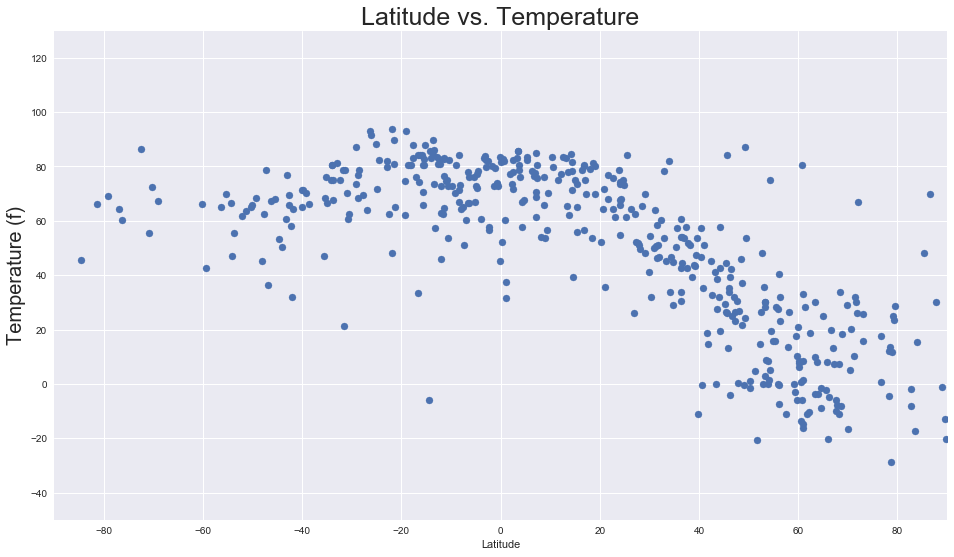

In [10]:
sns.set()

#create scatterplot for temperature
x = citiesdf['Latitude']
plt.xlabel("Latitude")
plt.xlim(-90, 90)


#set y, allow outliers in axis, 

y = citiesdf['Temperature']
plt.ylabel('Temperature (f)', fontsize = 20)
plt.ylim(-50, 130)

# use the scatter function
plt.scatter(x, y)
plt.rcParams["figure.figsize"] = [16,9]

#adding a title
plt.title('Latitude vs. Temperature', fontsize = 25)

plt.savefig('temperature.pdf')
plt.show()

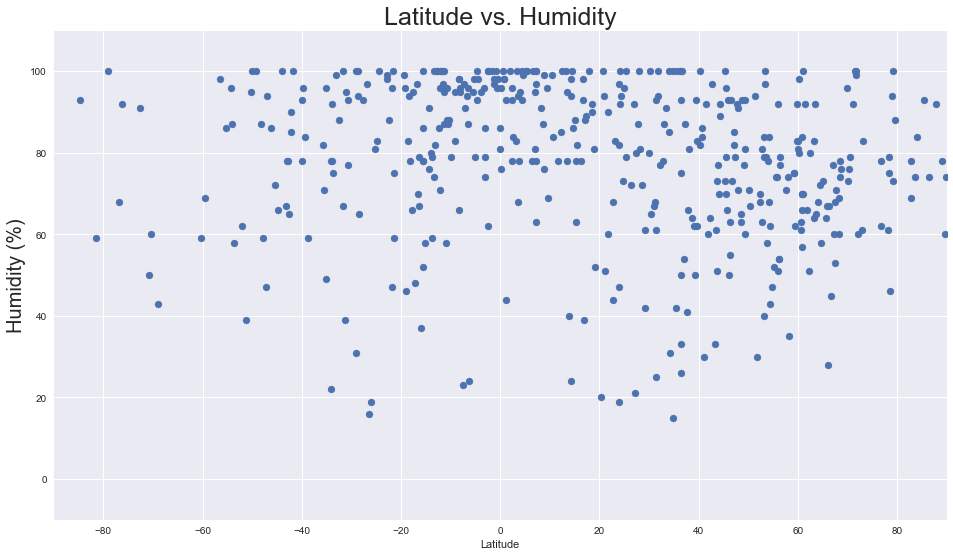

In [18]:
#create scatterplot for humidity
x = citiesdf['Latitude']
plt.xlabel("Latitude")
plt.xlim(-90, 90)

#set y, allow outliers in axis, 

y = citiesdf['Humidity']
plt.ylabel('Humidity (%)', fontsize = 20)
plt.ylim(-10, 110)

# use the scatter function
plt.scatter(x, y)
plt.rcParams["figure.figsize"] = [16,9]

#adding a title
plt.title('Latitude vs. Humidity', fontsize = 25)

plt.savefig('humidity.pdf')
plt.show()

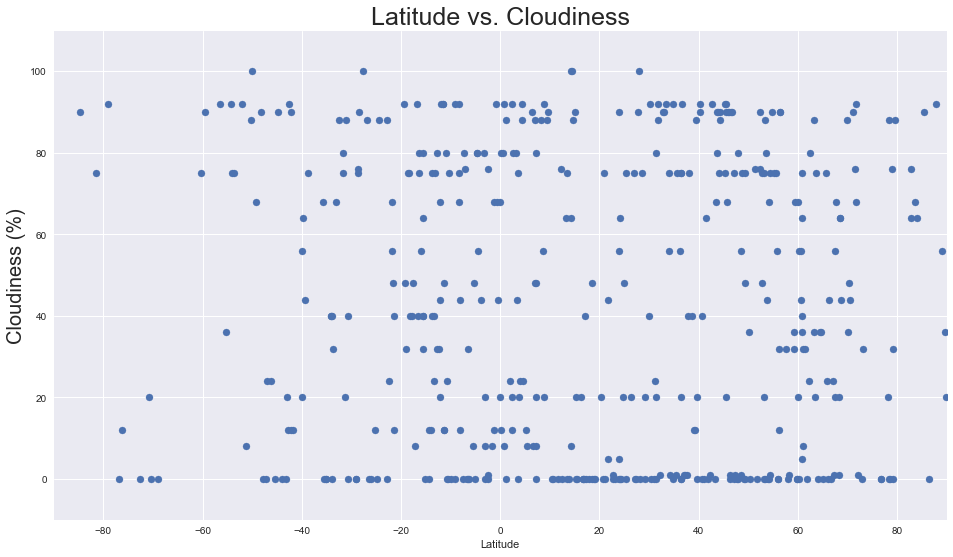

In [12]:
#create scatterplot for cloudiness
x = citiesdf['Latitude']
plt.xlabel("Latitude")
plt.xlim(-90, 90)

#set y, allow outliers in axis, 

y = citiesdf['Cloudiness']
plt.ylabel('Cloudiness (%)', fontsize = 20)
plt.ylim(-10, 110)

# use the scatter function
plt.scatter(x, y)
plt.rcParams["figure.figsize"] = [16,9]

#adding a title
plt.title('Latitude vs. Cloudiness', fontsize = 25)

plt.savefig('cloudiness.pdf')
plt.show()

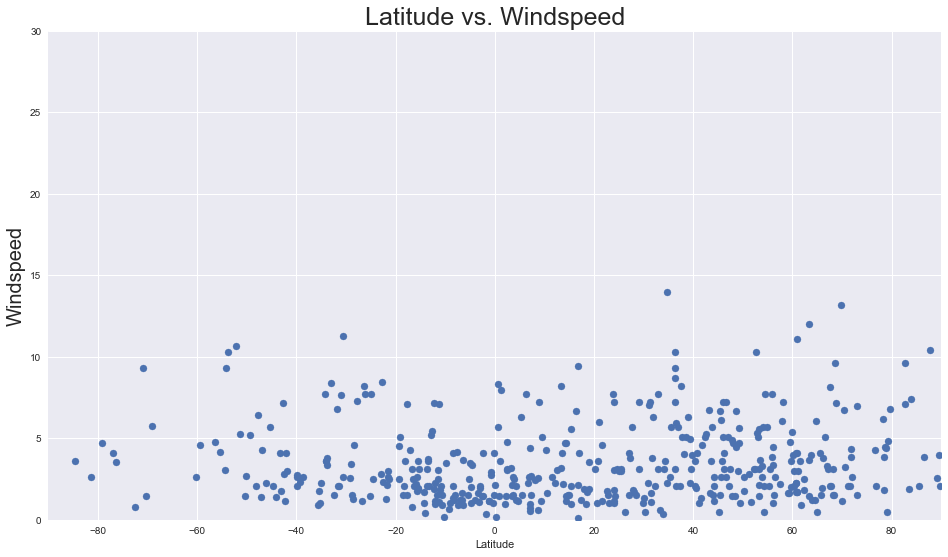

In [17]:
#create scatterplot for humidity
x = citiesdf['Latitude']
plt.xlabel("Latitude")
plt.xlim(-90, 90)

#set y, allow outliers in axis, 

y = citiesdf['Windspeed']
plt.ylabel('Windspeed', fontsize = 20)
plt.ylim(0, 30)

# use the scatter function
plt.scatter(x, y)
plt.rcParams["figure.figsize"] = [16,9]

#adding a title
plt.title('Latitude vs. Windspeed', fontsize = 25)

plt.savefig('windspeed.pdf')
plt.show()

In [14]:
print("Observation 1. The latitude vs. temperature relationship is demonstrating the occurence of seasons. Currently, it is still winter in the Northern Hemisphere therefore temps are generally lower. Furthermore, as you go further away from the equator (higher latitude) you encounter lower temperatures.")

Observation 1. The latitude vs. temperature relationship is demonstrating the occurence of seasons. Currently, it is still winter in the Northern Hemisphere therefore temps are generally lower. Furthermore, as you go further away from the equator (higher latitude) you encounter lower temperatures.


In [15]:
print('Observation 2. Higher humidity seems to be clustered around the equator. The further from the equater, the less likely that humidity is at 100%')

Observation 2. Higher humidity seems to be clustered around the equator. The further from the equater, the less likely that humidity is at 100%


In [16]:
print("Observation 3. Windspeed appears to increase as we get further from the equator in both directions. However, due to the lack of cities in the southern hemisphere, there isn't a clealry defined symmetry to make this suggestion.")

Observation 3. Windspeed appears to increase as we get further from the equator in both directions. However, due to the lack of cities in the southern hemisphere, there isn't a clealry defined symmetry to make this suggestion.
